<a href="https://colab.research.google.com/github/itsmepriyabrata/priyabrata_ai_python/blob/main/anamoly%20detection%20%20algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 isolation forest

Confusion Matrix:
[[288  12]
 [  0  20]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       300
           1       0.62      1.00      0.77        20

    accuracy                           0.96       320
   macro avg       0.81      0.98      0.87       320
weighted avg       0.98      0.96      0.97       320


Accuracy Score: 0.9625


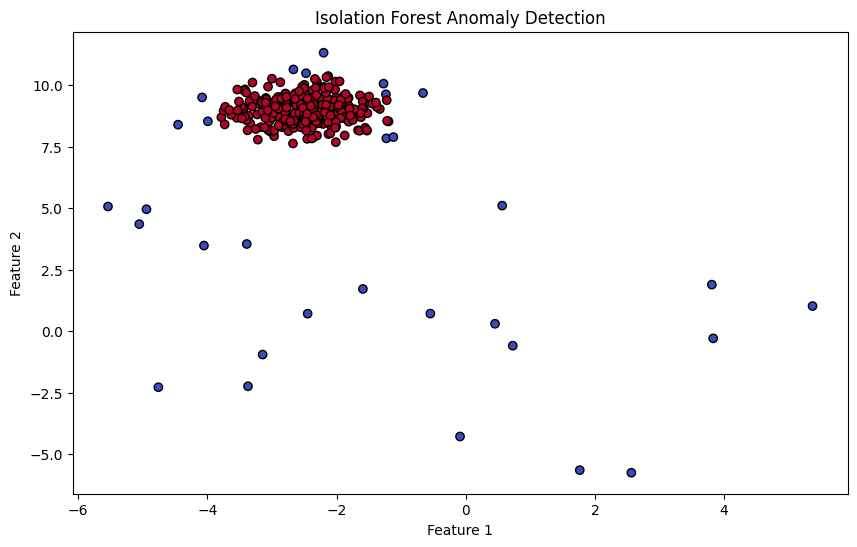

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.60, random_state=42)
anomalies = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.concatenate([X, anomalies], axis=0)

y_true = np.ones(len(X))
y_true[-len(anomalies):] = -1

iso_forest = IsolationForest(contamination=0.1, random_state=42)

iso_forest.fit(X)

y_pred = iso_forest.predict(X)

y_pred_mapped = np.where(y_pred == 1, 0, 1)
y_true_mapped = np.where(y_true == 1, 0, 1)

print("Confusion Matrix:")
print(confusion_matrix(y_true_mapped, y_pred_mapped))

print("\nClassification Report:")
print(classification_report(y_true_mapped, y_pred_mapped))

print("\nAccuracy Score:", accuracy_score(y_true_mapped, y_pred_mapped))

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolor='k')
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


one-class SVM

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.60, random_state=42)
X_anomalies = np.random.uniform(low=-6, high=6, size=(30, 2))
X = np.concatenate([X, X_anomalies], axis=0)
y = np.concatenate([np.ones(300), -1 * np.ones(30)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)

ocsvm.fit(X_train)

y_pred_train = ocsvm.predict(X_train)
y_pred_test = ocsvm.predict(X_test)

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

print("\nTesting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

print("\nTesting Classification Report:")
print(classification_report(y_test, y_pred_test))


Training Confusion Matrix:
[[ 13   8]
 [  8 202]]

Testing Confusion Matrix:
[[ 9  0]
 [ 4 86]]

Testing Classification Report:
              precision    recall  f1-score   support

        -1.0       0.69      1.00      0.82         9
         1.0       1.00      0.96      0.98        90

    accuracy                           0.96        99
   macro avg       0.85      0.98      0.90        99
weighted avg       0.97      0.96      0.96        99

